In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
crime = pd.read_csv('Chicago_Crimes.csv')
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

In [4]:
crime.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [5]:
crime['Location Description'] = crime['Location Description'].fillna('uncategorize')
crime['Community Area'] = crime['Community Area'].fillna('uncategorize')
crime['X Coordinate'] = crime['X Coordinate'].fillna('uncategorize')
crime['Y Coordinate'] = crime['Y Coordinate'].fillna('uncategorize')
crime['Latitude'] = crime['Latitude'].fillna('uncategorize')
crime['Longitude'] = crime['Longitude'].fillna('uncategorize')
crime['Location'] = crime['Location'].fillna('uncategorize')
crime.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [6]:
crime.dtypes

ID                       int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                    bool
Domestic                  bool
Beat                     int64
District                 int64
Ward                     int64
Community Area          object
FBI Code                object
X Coordinate            object
Y Coordinate            object
Year                     int64
Updated On              object
Latitude                object
Longitude               object
Location                object
dtype: object

In [7]:
crime['Date'] = crime['Date'].astype('str')
crime['Date'] = crime['Date'].str.strip()
crime['Date'] = crime['Date'].str.replace('/','-')
crime['Date'] = pd.to_datetime(crime['Date'], dayfirst = True, errors = 'coerce')

crime['Date'] = crime['Date'].astype('int64')

In [8]:
for col in crime.select_dtypes(include="object").columns:
    crime[col] = crime[col].astype("category")
    
crime.dtypes

ID                         int64
Case Number             category
Date                       int64
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                   int64
Ward                       int64
Community Area          category
FBI Code                category
X Coordinate            category
Y Coordinate            category
Year                       int64
Updated On              category
Latitude                category
Longitude               category
Location                category
dtype: object

<h1>EDA</h1><hr>

<h2>Graph 1 : Type of Crime</h2>

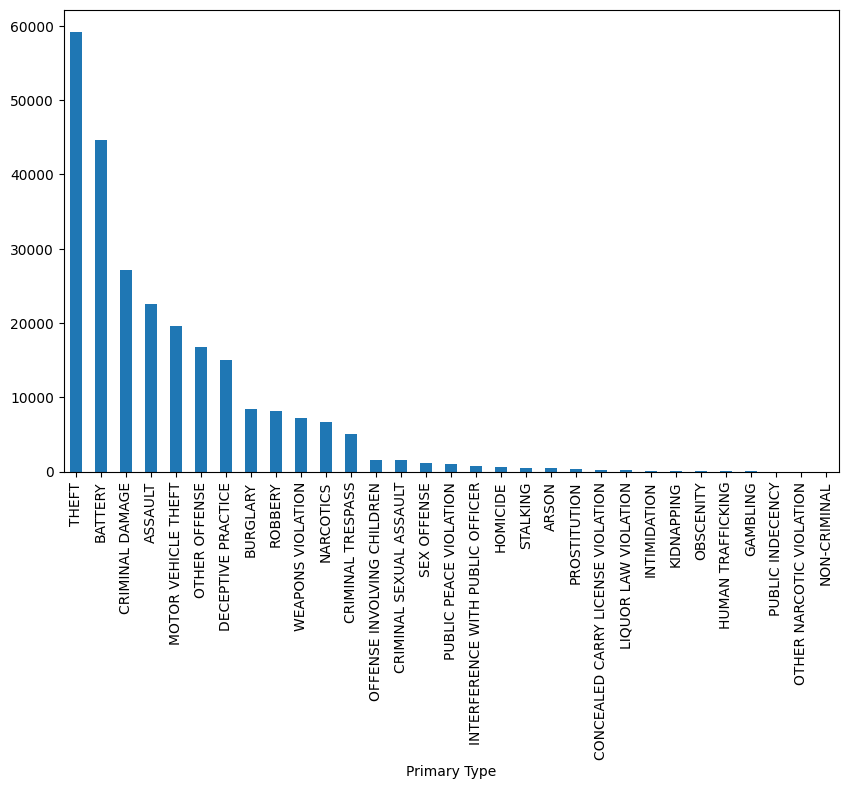

Primary Type
THEFT                                59201
BATTERY                              44579
CRIMINAL DAMAGE                      27094
ASSAULT                              22615
MOTOR VEHICLE THEFT                  19604
OTHER OFFENSE                        16781
DECEPTIVE PRACTICE                   14991
BURGLARY                              8443
ROBBERY                               8200
WEAPONS VIOLATION                     7164
NARCOTICS                             6627
CRIMINAL TRESPASS                     5045
OFFENSE INVOLVING CHILDREN            1597
CRIMINAL SEXUAL ASSAULT               1573
SEX OFFENSE                           1210
PUBLIC PEACE VIOLATION                1006
INTERFERENCE WITH PUBLIC OFFICER       771
HOMICIDE                               553
STALKING                               520
ARSON                                  452
PROSTITUTION                           287
CONCEALED CARRY LICENSE VIOLATION      249
LIQUOR LAW VIOLATION                   19

In [9]:
type_crime = crime['Primary Type'].value_counts()
type_crime.plot(kind='bar', figsize=(10,6))
plt.show()
type_crime

<h3>INSIGHTS : <br>
-    The Top 5 type of crimes is THEFT (59201), BATTERY (44579), CRIMINAL DAMAGE (27094), ASSAULT (22615), & MOTOR VEHICLE THEFT (19604).<br>
-   'Theft' is the highest type of crime recorded in chicago with 59201 crimes.<br>
-   'Non-Criminal' is the lowest type of crime recorded in chicago with 4 crimes.</h3><hr>

<h2>Graph 2 : Description of Crime</h2>

Description
SIMPLE                     30526
DOMESTIC BATTERY SIMPLE    19810
$500 AND UNDER             17963
OVER $500                  16572
TO VEHICLE                 14886
AUTOMOBILE                 14780
RETAIL THEFT               14053
TO PROPERTY                11652
AGGRAVATED - HANDGUN        5935
FROM BUILDING               4941
Name: count, dtype: int64

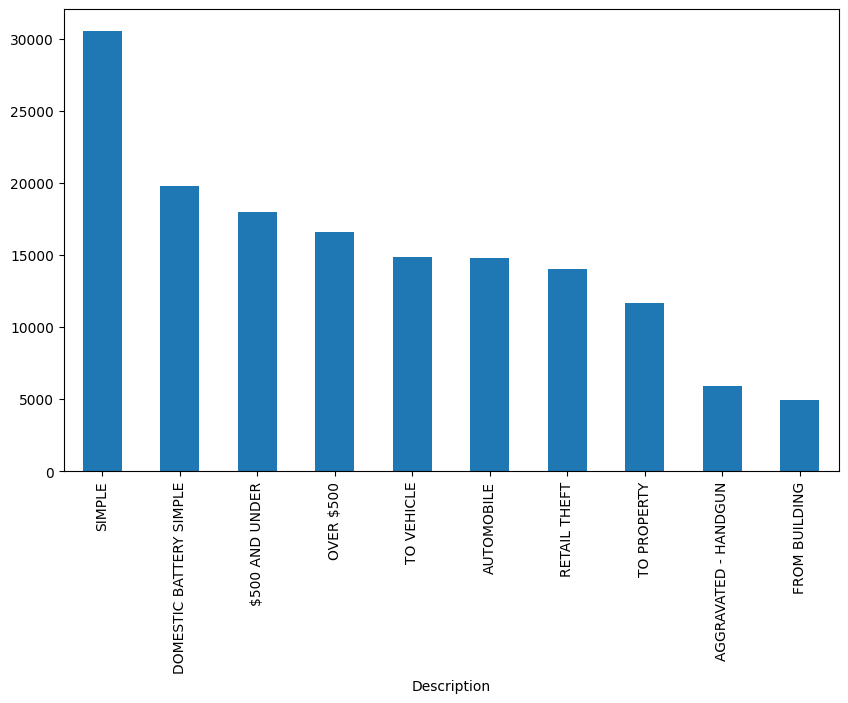

In [10]:
desc_crime = crime['Description'].value_counts().head(10)
desc_crime.plot(kind='bar', figsize=(10,6))
desc_crime

<h3>INSIGHTS : <br>
-    The most frequent discription of the crime is 'Simple' with 30526 crimes.<br>
-    The top 5 of the most frequent discription of the crime is SIMPLE (30526), DOMESTIC BATTERY SIMPLE (19810), $500 AND UNDER (17963), OVER $500 (16572) & TO VEHICLE (14886)</h3>

In [29]:
desc_type_crime = crime.groupby(['Primary Type'])['Description'].head(10)
desc_type_crime.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Descritption of Type of Accident')
plt.show()
desc_type_crime

TypeError: no numeric data to plot

<h3>INSIGHT : <br>
-   'Theft' are the only recorded crime with a Discription of '$500 AND UNDER'. </h3>

<hr><h2>Graph 3 : Location Description of Crime</h2>

Location Description
STREET                                    66040
APARTMENT                                 47787
RESIDENCE                                 29776
SIDEWALK                                  13265
SMALL RETAIL STORE                         9858
PARKING LOT / GARAGE (NON RESIDENTIAL)     8350
RESTAURANT                                 6094
DEPARTMENT STORE                           5768
ALLEY                                      5695
OTHER (SPECIFY)                            4072
Name: count, dtype: int64

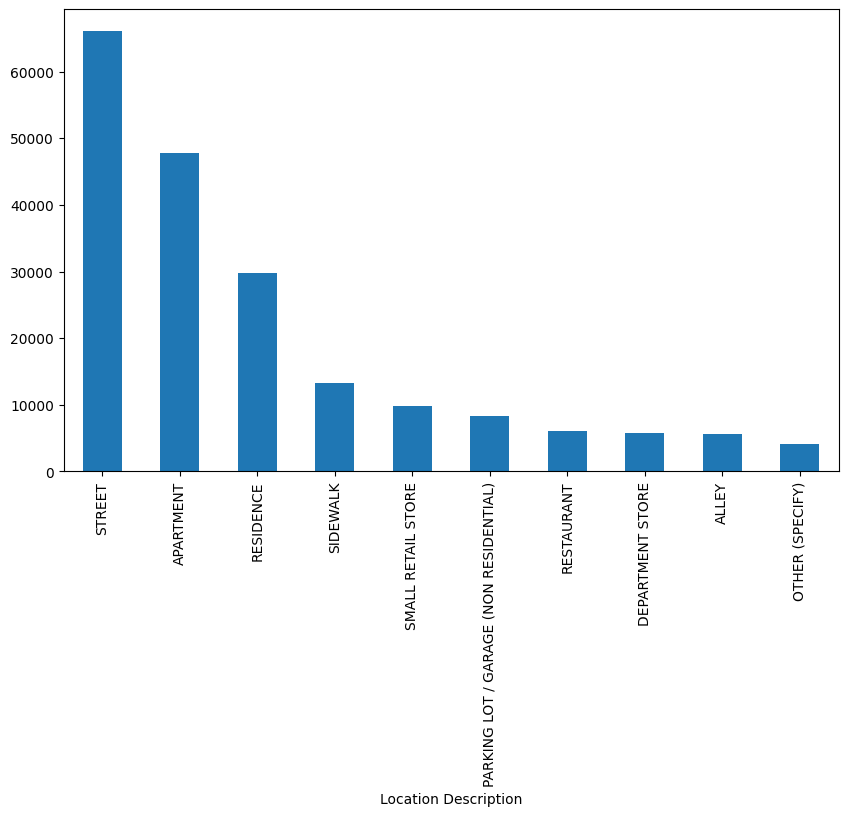

In [12]:
loc_disc_crime = crime['Location Description'].value_counts().head(10)
loc_disc_crime.plot(kind='bar', figsize=(10,6))
loc_disc_crime

<h3>INSIGHTS :<br>
-   The most frequent Location Discription is 'Street' with 66040 crimes.<br>
-   The less frequent Location Discription is 'Other' with 4072 crimes.<br>
-   The Top 5 Location Description of a Crime are STREET (66040), APARTMENT (47787), RESIDENCE (29776), SIDEWALK (13265), & SMALL RETAIL STORE (9858).</h3>

<hr><h2>Graph 4 : Crimes Arrested</h2>

Arrest
False    213121
True      36002
Name: count, dtype: int64

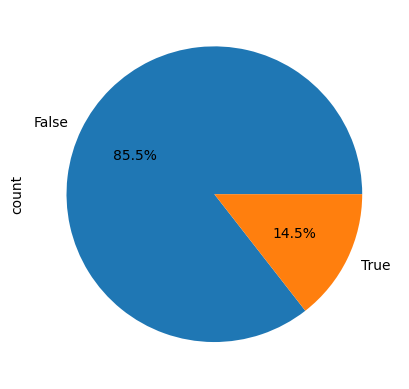

In [13]:
arrest_crime = crime['Arrest'].value_counts()
arrest_crime.plot(kind='pie', autopct = '%1.1f%%')
arrest_crime

<h3>INSIGHTS : <br>
-    85.5% (213121) of the recorded crimes are not arrested.<br>
-    14.5% (36002) of the recorded crimes are arrested.</h3>

<hr><h2>Graph 5 : Domestic Crimes</h2>

Domestic
False    202776
True      46347
Name: count, dtype: int64

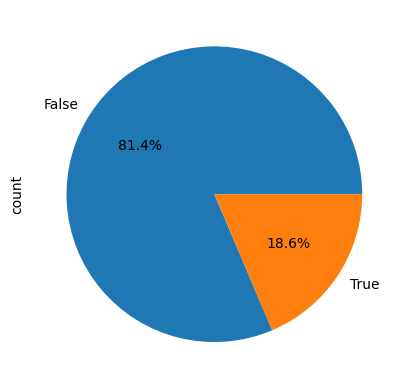

In [14]:
domestic_crime = crime['Domestic'].value_counts()
domestic_crime.plot(kind='pie', autopct = '%1.1f%%')
domestic_crime

<h3>INSIGHTS : <br>
-    81.4% (202776) of the recorded crimes are not Domestic.<br>
-    18.6% (46347) of the recorded crimes are Domestic.</h3>

<hr><h2>Graph 6 : Block</h2>

In [15]:
# crime_block = crime['Block'].value_counts()
# crime_block.p2lot(kind='bar')
# plt.xticks(rotation=90)
# crime_block

<hr>
<h2>Graph 7 : District</h2>

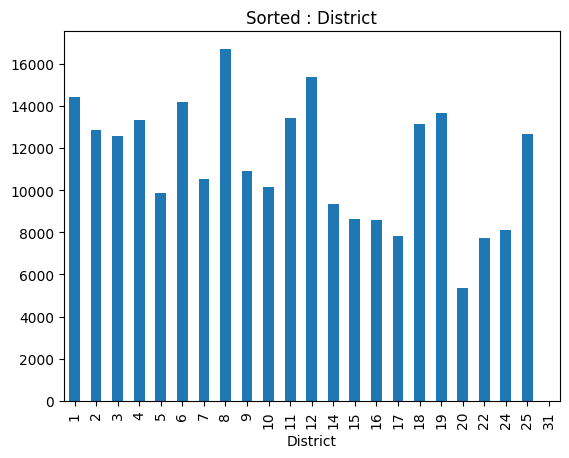

District
1     14409
2     12848
3     12545
4     13318
5      9883
6     14157
7     10520
8     16691
9     10910
10    10133
11    13423
12    15355
14     9341
15     8605
16     8570
17     7801
18    13118
19    13640
20     5362
22     7710
24     8101
25    12664
31       19
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

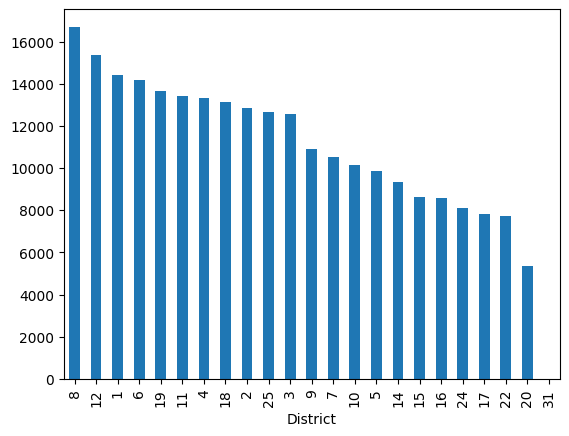

In [16]:
dist_crime2 = crime['District'].value_counts().sort_index()
dist_crime2.plot(kind='bar', title = 'Sorted : District')
plt.show()
print(dist_crime2)
dist_crime = crime['District'].value_counts()
dist_crime.plot(kind='bar')
plt.show

<h3>INSIGHTS :<br>
-    District 8 got the highest recorded crime with 16691 crimes.<br>
-    District 31 got the lowest recorded crime with 19 crimes.<br>
-    Top 5 District with highest recorded crime are Districts 8, 12, 1, 6, 19, respectively.<br>
-    Top 5 District with lowest recorded crime are Districts 31, 20, 22, 17, 24, respectively.<br>
</h3>

<hr><h2>Graph 8: Ward</h2>

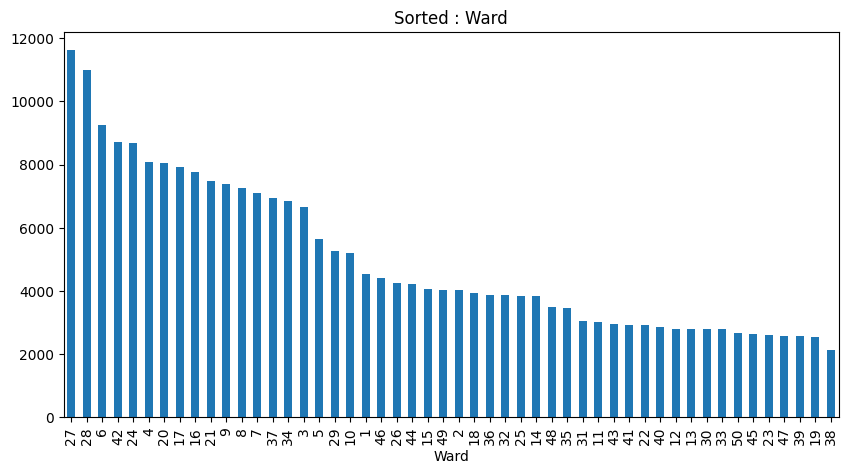

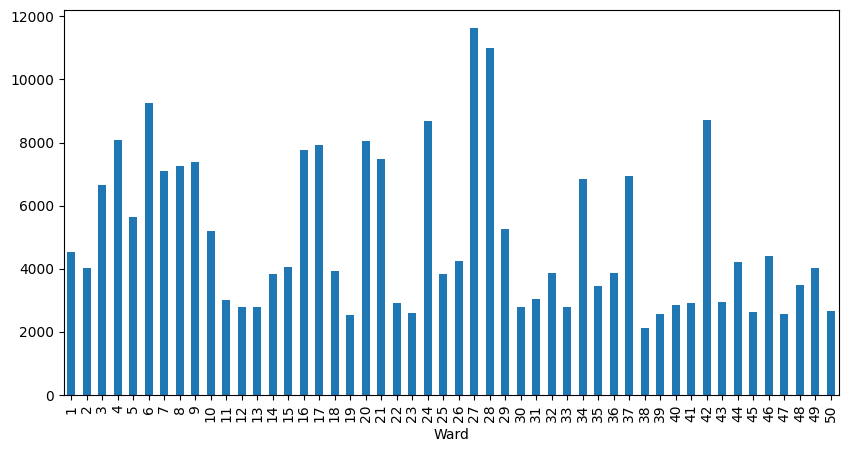

Ward
1      4521
2      4014
3      6640
4      8095
5      5638
6      9246
7      7086
8      7247
9      7399
10     5193
11     3026
12     2799
13     2796
14     3831
15     4042
16     7766
17     7914
18     3934
19     2522
20     8037
21     7480
22     2916
23     2593
24     8686
25     3847
26     4262
27    11622
28    11013
29     5274
30     2789
31     3038
32     3861
33     2782
34     6841
35     3464
36     3877
37     6940
38     2118
39     2557
40     2843
41     2918
42     8721
43     2948
44     4218
45     2636
46     4393
47     2561
48     3499
49     4031
50     2649
Name: count, dtype: int64

In [17]:
ward_crime = crime['Ward'].value_counts()
ward_crime.plot(kind='bar',figsize=(10,5), title='Sorted : Ward')
plt.show()

ward_crime2 = ward_crime.sort_index()
ward_crime2.plot(kind='bar',figsize=(10,5))
plt.show()

ward_crime2

<h3>INSIGHTS :<br>
-    Ward 27 got the highest recorded crime with 11622 crimes.<br>
-    Ward 38 got the lowest recorded crime with 2118 crimes.<br>
-    Top 5 Ward with highest recorded crime are Wards 27, 28, 6, 42, 24, respectively.<br>
-    Top 5 Ward with lowest recorded crime are Wards 38, 19, 39, 47, 23, respectively.<br>
</h3>

<hr><h2>Graph 9: Community Area</h2>

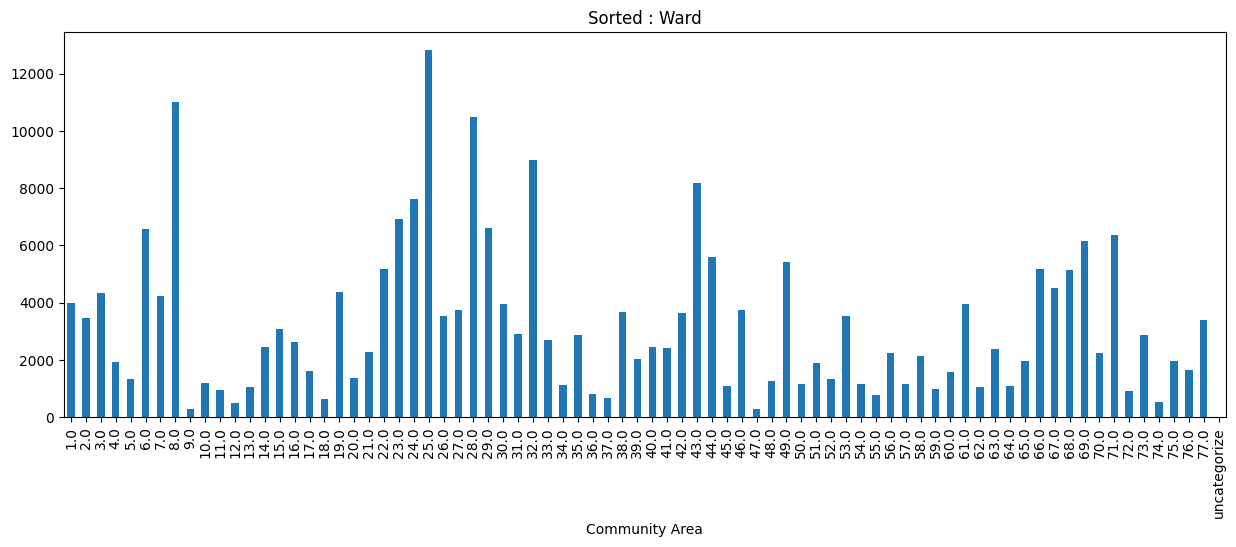

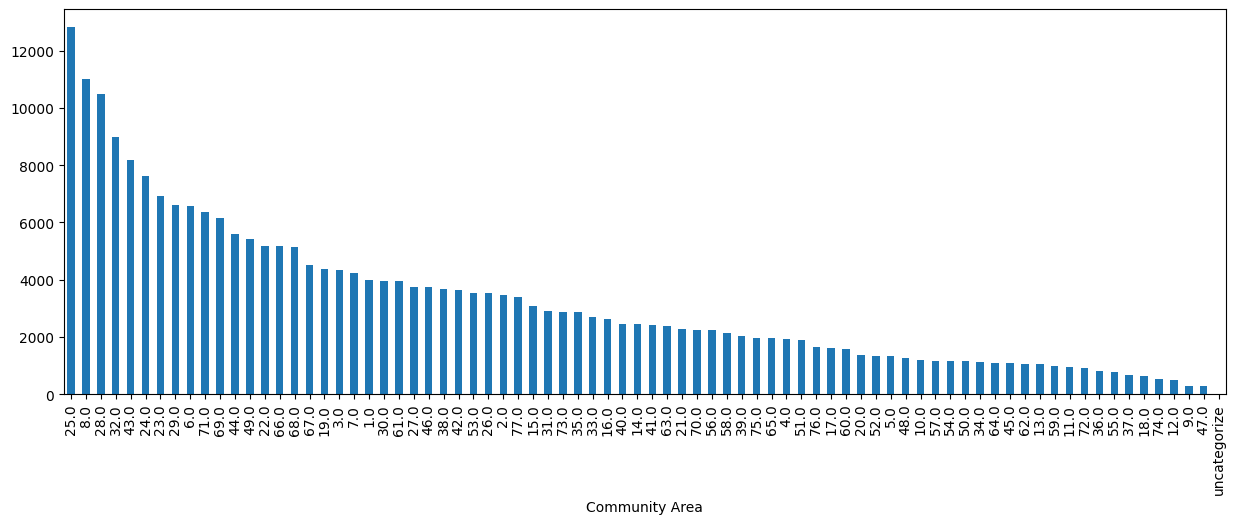

Community Area
1.0             3998
2.0             3462
3.0             4320
4.0             1919
5.0             1319
                ... 
74.0             527
75.0            1956
76.0            1658
77.0            3386
uncategorize       3
Name: count, Length: 78, dtype: int64

In [18]:
com_area_crime_sort = crime['Community Area'].value_counts().sort_index()
com_area_crime_sort.plot(kind='bar',figsize=(15,5), title='Sorted : Ward')
plt.show()
com_area_crime= crime['Community Area'].value_counts()
com_area_crime.plot(kind='bar',figsize=(15,5))
plt.show()
com_area_crime_sort

<h3>INSIGHTS :<br>
-    Community Area 25 got the highest recorded crime.<br>
-    47 Community Area got the lowest recorded crime aside from the Uncategorized Area.<br>
-    Top 5 Uncategorize Community Area with highest recorded crime are Area 25, 8, 28, 32, 43, respectively.<br>
-    Top 5  Uncategorize Community Area with lowest recorded crime aside from the uncategorize area are Area 47, 9, 12, 74, 18, respectively.<br>
</h3>

<h2>Graph 10 : FBI Code</h2>

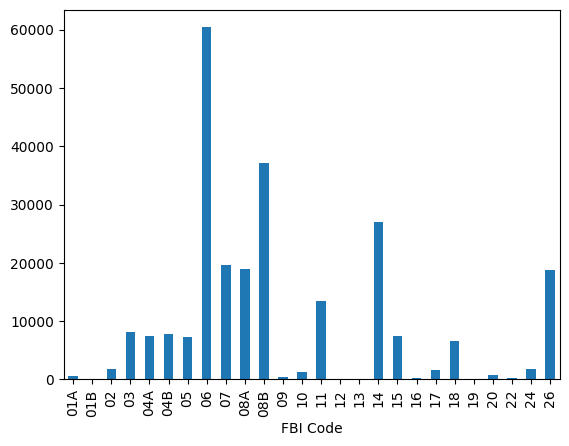

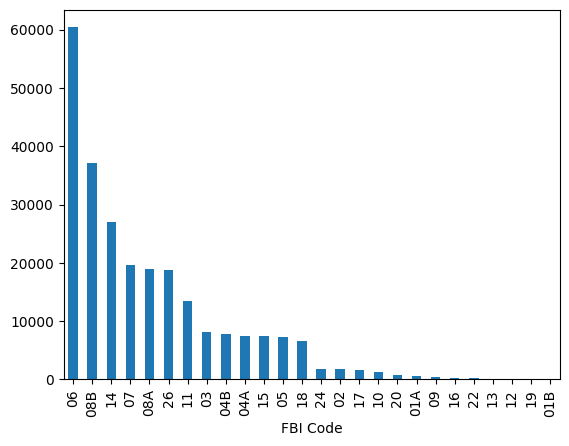

FBI Code
06     60380
08B    37090
14     27094
07     19604
08A    19009
26     18855
11     13534
03      8200
04B     7851
04A     7473
15      7417
05      7264
18      6617
24      1759
02      1751
17      1578
10      1360
20       696
01A      551
09       452
16       287
22       192
13        63
12        26
19        18
01B        2
Name: count, dtype: int64

In [19]:
Crime_code_sort = crime['FBI Code'].value_counts().sort_index()
Crime_code_sort.plot(kind='bar')
plt.show()

Crime_code = crime['FBI Code'].value_counts()
Crime_code.plot(kind='bar')
plt.show()

Crime_code

<h3>INSIGHTS :<br>
-    FBI Code 06 got the highest record.<br>
-    FBI Code 01B got the lowest record.<br>
-    Top 5 FBI Code with highest recorded crime are FBI Code 06, 08B, 14, 17, 08A, respectively.<br>
-    Top 5 FBI Code with lowest recorded crime are FBI Code 01B, 19, 12, 13, 22, respectively.<br>
</h3>

In [20]:
crime.dtypes

ID                         int64
Case Number             category
Date                       int64
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                   int64
Ward                       int64
Community Area          category
FBI Code                category
X Coordinate            category
Y Coordinate            category
Year                       int64
Updated On              category
Latitude                category
Longitude               category
Location                category
dtype: object

In [21]:
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,1713052800000000000,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,1713052800000000000,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,1713052800000000000,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.90764,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,1713052800000000000,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,1713052800000000000,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,1764806400000000000,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.92844,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,1764806400000000000,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.63204,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,1764806400000000000,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,1764806400000000000,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"
